***

<h1> Machine Learning with Linear Regression Model </h1>

by **Ivan Manurung**, a Data Strategist and Machine Learning Analyst

***

**Case:**
<br>
Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home.
Developed for the busy professional that has little to no skills in the kitchen, they offer a wide
selection of daily-prepared gourmet meals delivered directly to your door. Each meal set takes
at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's awardwinning
disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and
easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile
app.


**Challenge:** 
<br>
In an effort to diversify their revenue stream, Apprentice Chef, Inc. has launched Halfway There,
a cross-selling promotion where subscribers receive a half bottle of wine from a local California
vineyard every Wednesday (halfway through the work week). The executives at Apprentice Chef
also believe this endeavor will create a competitive advantage based on its unique product
offering of hard to find local wines.
Halfway There has been exclusively offered to all of the customers in the dataset you received,
and the executives would like to promote this service to a wider audience. They have tasked
you with analyzing their data, developing your top insights, and building a machine

**Steps:**
1. Exploratory data analysis
2. Feature treatment and engineering
3. Utilizing appropriate modeling techniques

<h2>Part I: Data Preparation and Exploration</h2>

In [1]:
# Importing libraries for basic data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for predictive modeling
import statsmodels.formula.api as smf 
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

file = 'Apprentice_Chef_Dataset.xlsx' # Load the dataset

chef = pd.read_excel(file) # Store dataset into dataframe

**Loading and observing dataset by showing random row**

In [2]:
chef.sample(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
678,1240.0,1,Rodrik Greyjoy,rodrik.greyjoy@passport.com,Rodrik,Greyjoy,48,7,4,6,...,4,0,0,50,114.4,4,0,2,16,0
50,1680.0,1,Beron Stark,beron.stark@pg.com,Beron,Stark,56,3,6,10,...,8,0,0,80,157.2,5,1,3,14,0
254,2992.5,1,Clarence Crabb (Short),clarence.crabb.(short)@apple.com,Clarence,Crabb,180,7,6,10,...,3,0,0,60,150.6,5,1,3,13,143
1670,1520.0,0,Rohanne Webber,rohanne.webber@yahoo.com,Rohanne,Webber,118,3,5,4,...,4,0,0,20,159.5,3,0,3,15,0
1657,610.0,0,Rhaena Targaryen (daughter of Aegon III),rhaena.targaryen.(daughter.of.aegon.iii)@proto...,Rhaena,Targaryen,15,2,12,4,...,2,1,0,30,90.4,2,0,1,19,0


In [3]:
chef.info() # Checking total data entry and type for each variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

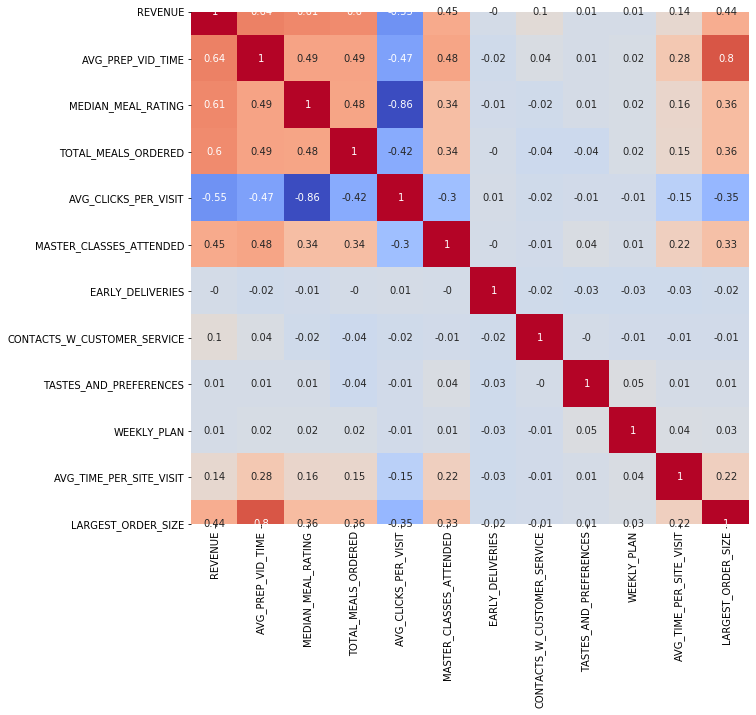

In [4]:
# Using correlation, we can select which features have high correlation with others that can help predict "Revenue"
chef_features = chef.copy()

fig, ax = plt.subplots(figsize=(10,10))

# Running and testing different variables until we find what we're looking for
chef_heat = chef_features.loc[ : , ['REVENUE',
                                    'AVG_PREP_VID_TIME',
                                    'MEDIAN_MEAL_RATING',
                                    'TOTAL_MEALS_ORDERED',
                                    'AVG_CLICKS_PER_VISIT',
                                    'MASTER_CLASSES_ATTENDED',
                                    'EARLY_DELIVERIES',
                                    'CONTACTS_W_CUSTOMER_SERVICE',
                                    'TASTES_AND_PREFERENCES',
                                    'WEEKLY_PLAN',
                                    'AVG_TIME_PER_SITE_VISIT',
                                    'LARGEST_ORDER_SIZE']].corr().round(2)

sns.heatmap(chef_heat,
            cmap = "coolwarm",
            square = True,
            annot = True,
            cbar = False)

plt.show()

Text(0.5, 0, 'Refrigerated Locker')

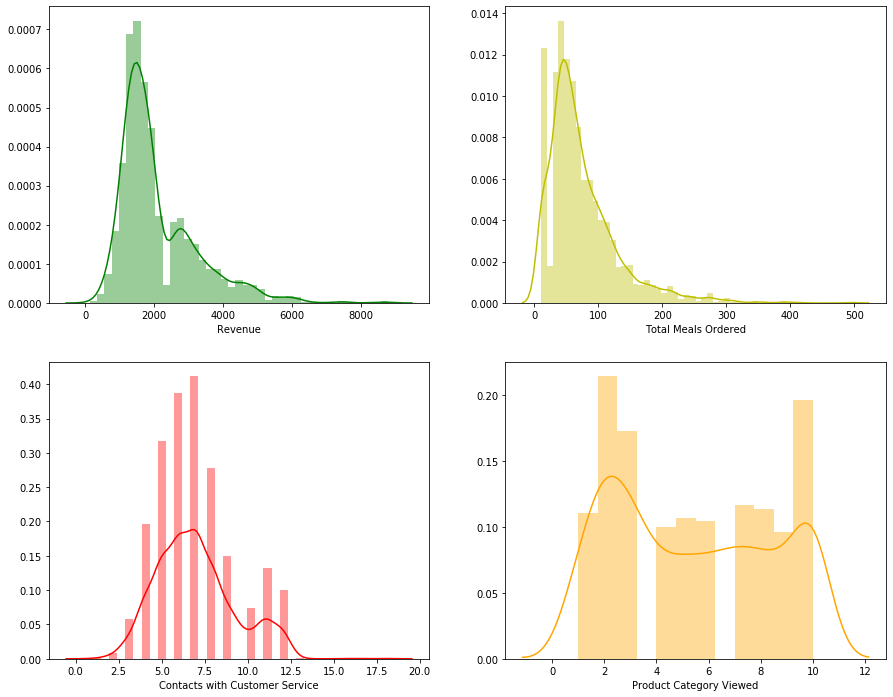

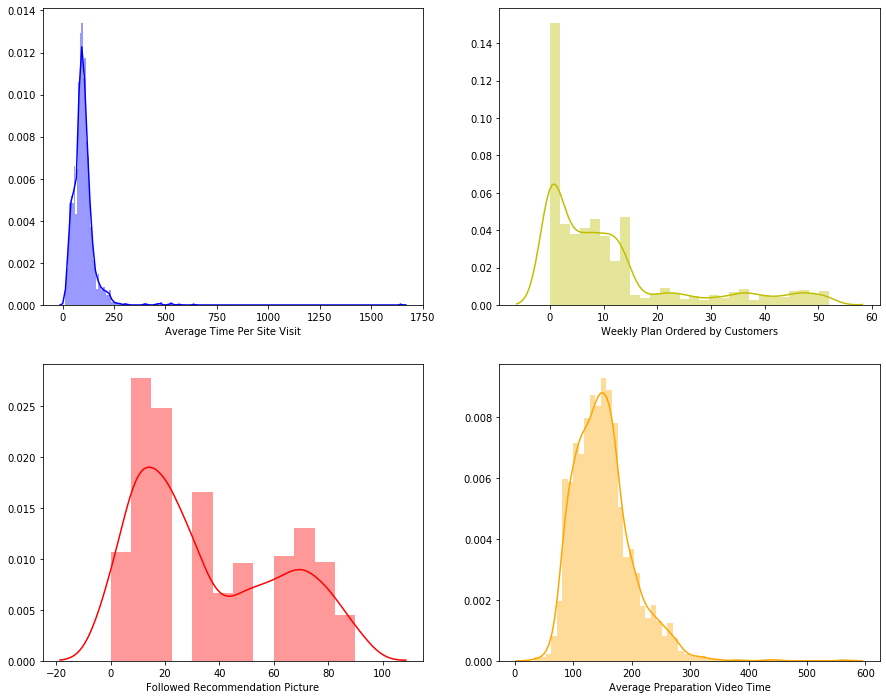

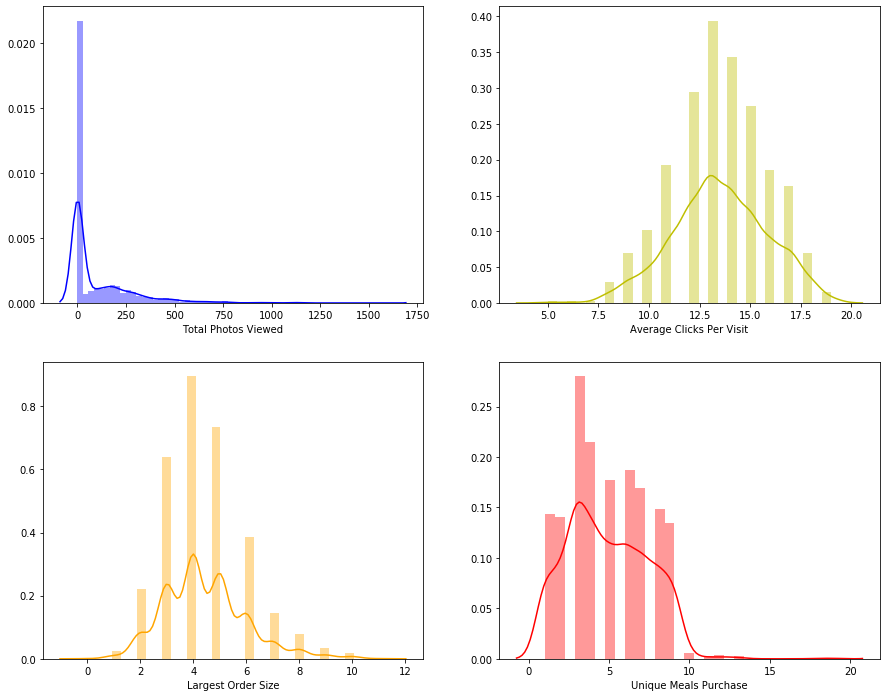

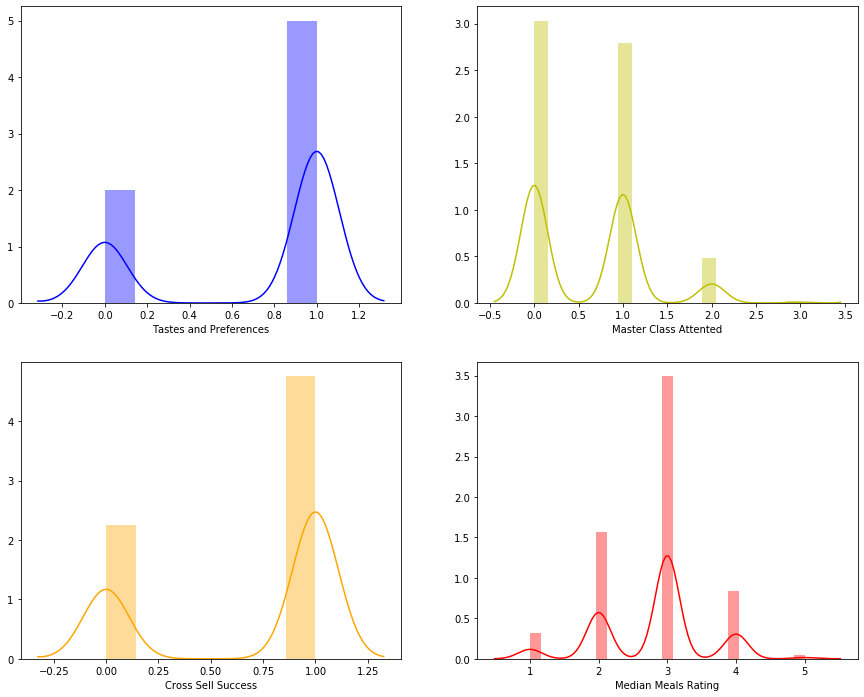

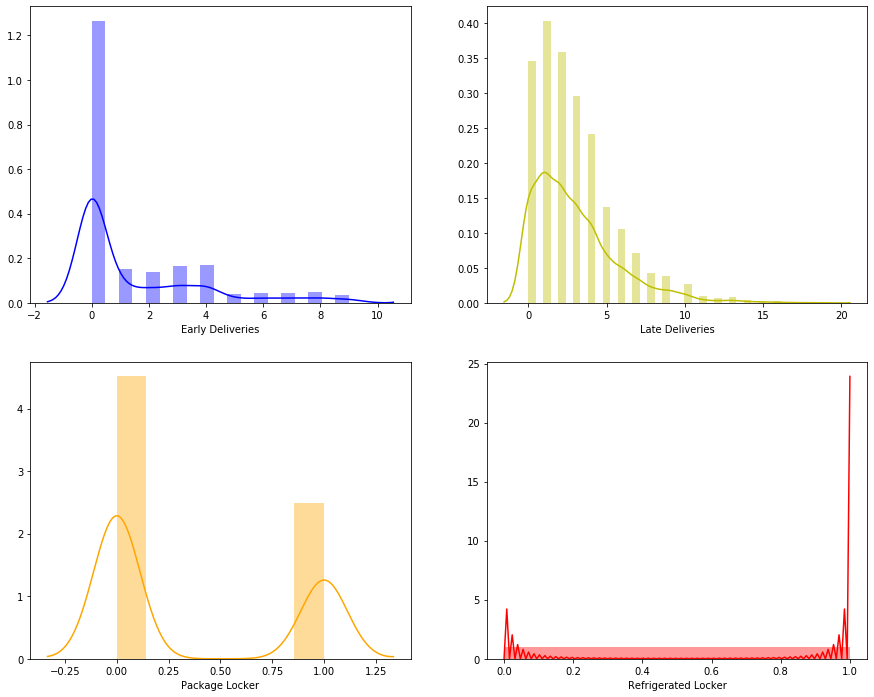

In [5]:
# Starting feature engineering by analyzing shape of the data for each variables
fig, ax = plt.subplots(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Revenue')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total Meals Ordered')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Contacts with Customer Service')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Product Category Viewed')

########################

fig, ax = plt.subplots(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Average Time Per Site Visit')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Weekly Plan Ordered by Customers')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Followed Recommendation Picture')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Average Preparation Video Time')

########################

fig, ax = plt.subplots(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Total Photos Viewed')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Average Clicks Per Visit')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Largest Order Size')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Unique Meals Purchase')

########################

fig, ax = plt.subplots(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.distplot(chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Tastes and Preferences')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Master Class Attented')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Cross Sell Success')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Median Meals Rating')

########################

fig, ax = plt.subplots(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Early Deliveries')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Late Deliveries')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Package Locker')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Refrigerated Locker')

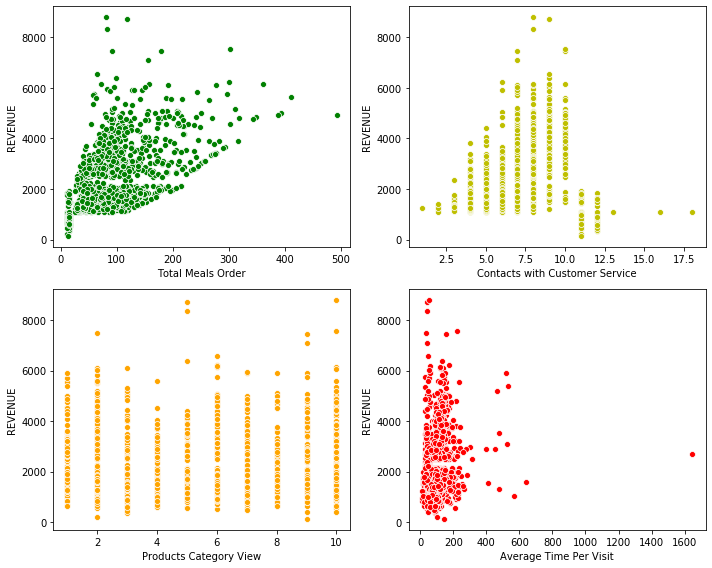

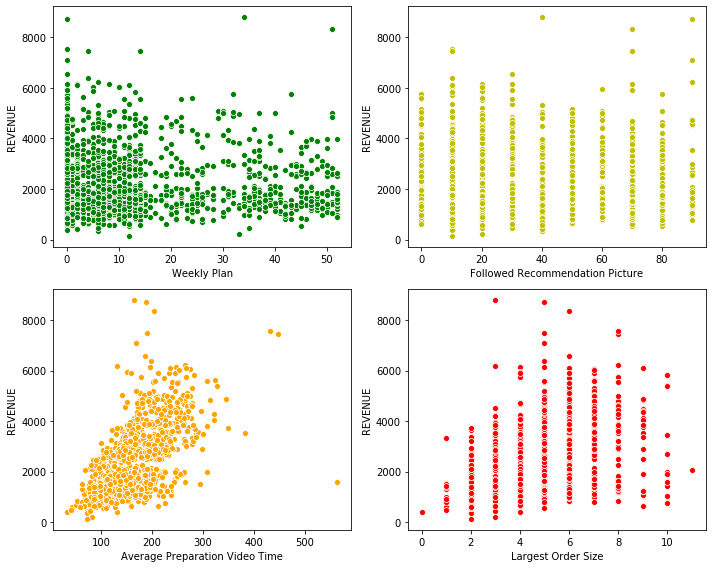

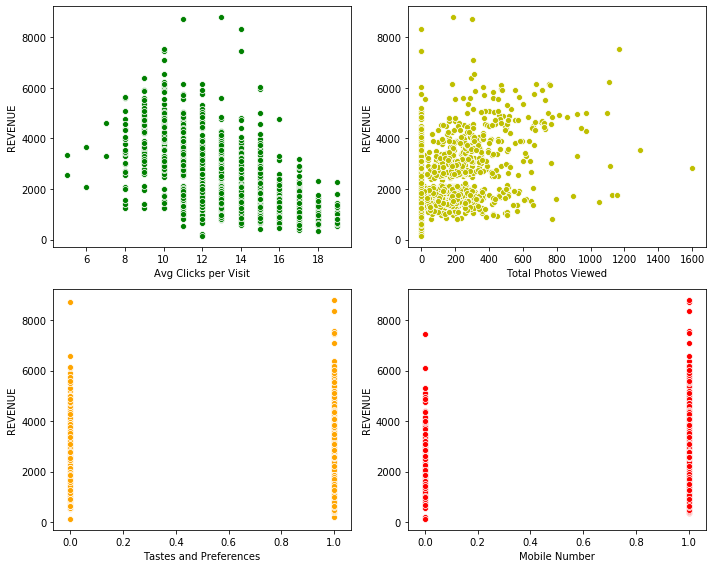

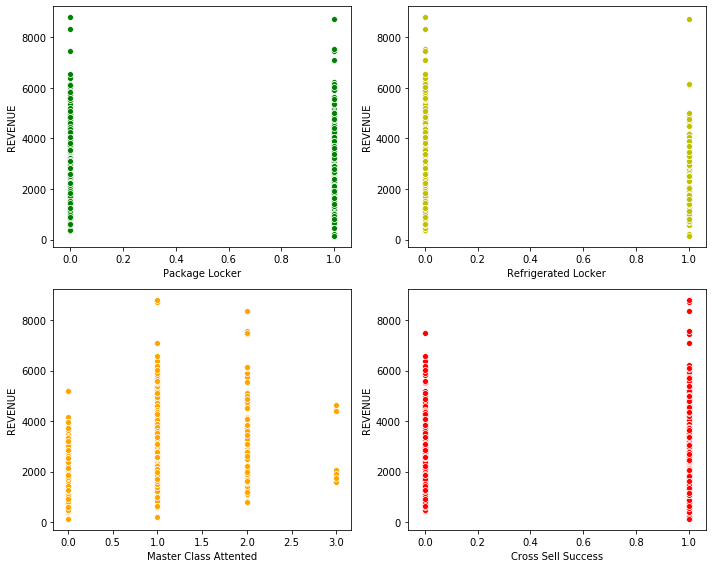

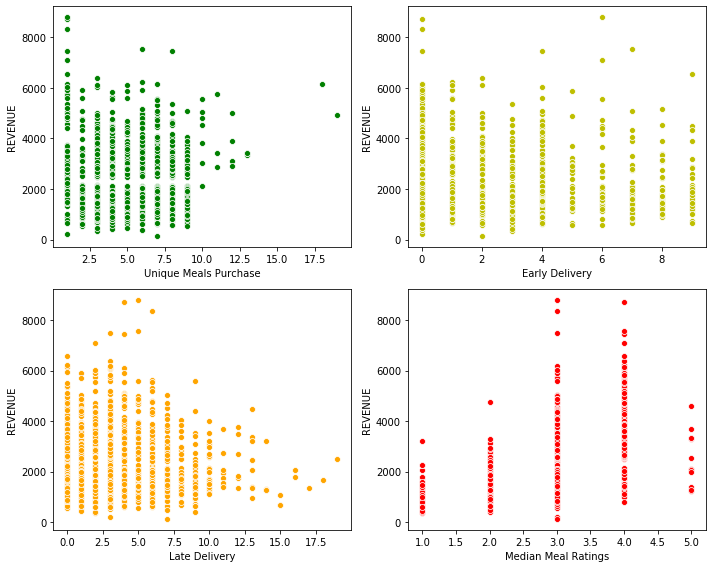

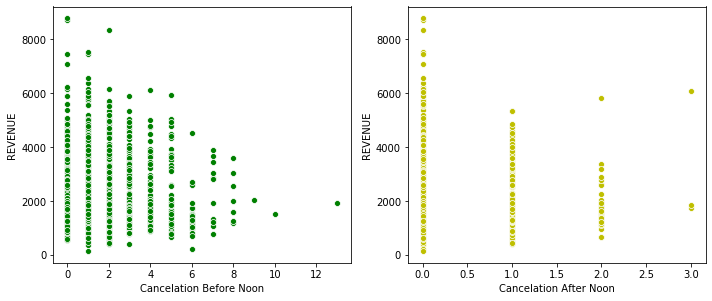

In [6]:
# Analyzing variables using scatterplot
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Total Meals Order')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Contacts with Customer Service')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Products Category View')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Average Time Per Visit')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Weekly Plan')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Followed Recommendation Picture')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Average Preparation Video Time')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Largest Order Size')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Avg Clicks per Visit')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Total Photos Viewed')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TASTES_AND_PREFERENCES'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Tastes and Preferences')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MOBILE_NUMBER'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Mobile Number')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['PACKAGE_LOCKER'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Package Locker')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['REFRIGERATED_LOCKER'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Refrigerated Locker')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Master Class Attented')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CROSS_SELL_SUCCESS'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Cross Sell Success')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Unique Meals Purchase')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Early Delivery')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Late Delivery')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Median Meal Ratings')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Cancelation Before Noon')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Cancelation After Noon')

########################

plt.tight_layout()
plt.show()

<br>

- From the heat map plot and plot above, the majority of the features do not really correlate with "Revenue".
- We can test all features but aware that we can make use of the highest correlation: Total Meals Ordered, Meals Rating, Largest Order Size and Product Category Viewed.

***
***

<h1>Part II: Feature Engineering</h1>

Let's start by grouping all of the variables or features

**Continous Variables**
- TOTAL_PHOTOS_VIEWED, AVG_CLICKS_PER_VISIT, LARGEST_ORDER_SIZE
- AVG_PREP_VID_TIME, FOLLOWED_RECOMMENDATIONS_PCT, WEEKLY_PLAN
- AVG_TIME_PER_SITE_VISIT, PRODUCT_CATEGORIES_VIEWED, 
- CONTACTS_W_CUSTOMER_SERVICE, TOTAL_MEALS_ORDERED, REVENUE

**Binary Variables**
- TASTES_AND_PREFERENCES, MOBILE_NUMBER, PACKAGE_LOCKER, PC_LOGINS, MOBILE_LOGINS
- REFRIGERATED_LOCKER, MASTER_CLASSES_ATTENDED, CROSS_SELL_SUCCESS

**Counts Variables**
- MEDIAN_MEAL_RATING, LATE_DELIVERIES, CANCELLATIONS_BEFORE_NOON
- EARLY_DELIVERIES, UNIQUE_MEALS_PURCH, CANCELLATIONS_AFTER_NOON

**Categorical Variables**
- NAME, EMAIL, FIRST_NAME, FAMILY_NAME

In [7]:
# Developing new features with outlier treshold

# Total Meals Ordered
total_meals_ordered_hi = 290
total_meals_ordered_lo = 12

chef['out_total_meals_ordered'] = 0
condition_hi = chef.loc[0:,'out_total_meals_ordered'][chef['TOTAL_MEALS_ORDERED'] > total_meals_ordered_hi]
condition_lo = chef.loc[0:,'out_total_meals_ordered'][chef['TOTAL_MEALS_ORDERED'] < total_meals_ordered_lo]

chef['out_total_meals_ordered'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_total_meals_ordered'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Product Category Viewed
product_category_viewed_hi = 9
product_category_viewed_lo = 3

chef['out_product_category_viewed'] = 0
condition_hi = chef.loc[0:,'out_total_meals_ordered'][chef['PRODUCT_CATEGORIES_VIEWED'] > product_category_viewed_hi]
condition_lo = chef.loc[0:,'out_total_meals_ordered'][chef['PRODUCT_CATEGORIES_VIEWED'] < product_category_viewed_lo]

chef['out_product_category_viewed'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_product_category_viewed'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Unique Meals Purchase
unique_meals_purch_hi = 9

chef['out_uniqe_meals_purchase'] = 0
condition_hi = chef.loc[0:,'out_uniqe_meals_purchase'][chef['UNIQUE_MEALS_PURCH'] > unique_meals_purch_hi]

chef['out_uniqe_meals_purchase'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Contacts Customer Service
contacts_cust_serv_hi = 10 

chef['out_contacts_cust_service'] = 0
condition_hi = chef.loc[0:,'out_contacts_cust_service'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_cust_serv_hi]

chef['out_contacts_cust_service'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Average time per visit
avg_time_per_visit_hi = 200 # check data for below 90 minutes visit time spent

chef['out_avg_time_per_visit'] = 0
condition_hi = chef.loc[0:,'out_avg_time_per_visit'][chef['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_visit_hi]

chef['out_avg_time_per_visit'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Weekly Plan
weekly_plan_hi = 15

chef['out_weekly_plan'] = 0
condition_hi = chef.loc[0:,'out_weekly_plan'][chef['WEEKLY_PLAN'] > weekly_plan_hi]

chef['out_weekly_plan'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Early Delivery
early_delivery_hi = 5

chef['out_early_delivery'] = 0
condition_hi = chef.loc[0:,'out_early_delivery'][chef['EARLY_DELIVERIES'] > early_delivery_hi]

chef['out_early_delivery'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Late Delivery
late_delivery_hi = 10
chef['out_late_delivery'] = 0
condition_hi = chef.loc[0:,'out_late_delivery'][chef['LATE_DELIVERIES'] > late_delivery_hi]

chef['out_late_delivery'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Average Prep Meals Video Viewed
avg_prep_vid_hi = 300

chef['out_prep_vid'] = 0
condition_hi = chef.loc[0:,'out_prep_vid'][chef['AVG_PREP_VID_TIME'] > avg_prep_vid_hi]

chef['out_prep_vid'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Master Class Attended
master_class_hi = 2

chef['out_master_class'] = 0
condition_hi = chef.loc[0:,'out_master_class'][chef['MASTER_CLASSES_ATTENDED'] > master_class_hi]

chef['out_master_class'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Median Meal Ratings
median_meal_rate_hi = 4

chef['out_median_meal_rate'] = 0
condition_hi = chef.loc[0:,'out_median_meal_rate'][chef['MEDIAN_MEAL_RATING'] > median_meal_rate_hi]

chef['out_median_meal_rate'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Average Click Per Visit
avg_click_visit_hi = 17.5

chef['out_avg_click_visit'] = 0
condition_hi = chef.loc[0:,'out_avg_click_visit'][chef['AVG_CLICKS_PER_VISIT'] > avg_click_visit_hi]

chef['out_avg_click_visit'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Total Photos Viewed
total_photo_view_hi = 500

chef['out_total_photo_view'] = 0
condition_hi = chef.loc[0:,'out_total_photo_view'][chef['TOTAL_PHOTOS_VIEWED'] > total_photo_view_hi]

chef['out_total_photo_view'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Largest Order Size
largest_ord_size_lo = 2
largest_ord_size_hi = 8

chef['out_largest_ord_size'] = 0
condition_hi = chef.loc[0:,'out_largest_ord_size'][chef['LARGEST_ORDER_SIZE'] > largest_ord_size_hi]
condition_lo = chef.loc[0:,'out_largest_ord_size'][chef['LARGEST_ORDER_SIZE'] < largest_ord_size_lo]

chef['out_largest_ord_size'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_largest_ord_size'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

In [8]:
########################################
## Developing Features above treshold ##
########################################

# Average Time Per Site Visit

avg_time_per_site_visit_change_hi = 400 # spotted data scatters above this point

chef['change_avg_time_per_visit'] = 0
condition = chef.loc[0:,'change_avg_time_per_visit'][chef['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit_change_hi]

chef['change_avg_time_per_visit'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

# Contacts Customer Service
contacts_with_cust_service_change_hi = 10 # spotted trend changes above this point

chef['change_contacts_cust_service'] = 0
condition = chef.loc[0:,'change_contacts_cust_service'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_with_cust_service_change_hi]


chef['change_contacts_cust_service'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

# Late Delivery
late_delivery_change_hi = 12.5 # spotted data scatters above this point

chef['change_late_delivery'] = 0
condition = chef.loc[0:,'change_late_delivery'][chef['LATE_DELIVERIES'] > late_delivery_change_hi]

chef['change_late_delivery'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

# Average Prep Meals Video Viewed
avg_prep_vid_time_change_hi = 300 # spotted data scatters above this point

chef['change_prep_vid'] = 0
condition = chef.loc[0:,'change_prep_vid'][chef['AVG_PREP_VID_TIME'] > avg_prep_vid_time_change_hi]

chef['change_prep_vid'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Total Photos Viewed
total_photos_view_change_hi = 800 # spotted data scatters above this point

chef['change_total_photos_view'] = 0
condition = chef.loc[0:,'change_total_photos_view'][chef['TOTAL_PHOTOS_VIEWED'] > total_photos_view_change_hi]

chef['change_total_photos_view'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)




##################################################################
## Developing Features change at a significant certain treshold ##
##################################################################

# Product Category Viewed at 2
weekly_plan_change_1_at = 2 # significantly higher proportion of population than other datapoints

chef['change_weekly_plan_change_1'] = 0
condition = chef.loc[0:,'change_weekly_plan_change_1'][chef['PRODUCT_CATEGORIES_VIEWED'] == weekly_plan_change_1_at]

chef['change_weekly_plan_change_1'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)




# Product Category Viewed at 10
weekly_plan_change_2_at = 10 # significantly higher proportion of population than other datapoints

chef['change_weekly_plan_change_2'] = 0
condition = chef.loc[0:,'change_weekly_plan_change_2'][chef['PRODUCT_CATEGORIES_VIEWED'] == weekly_plan_change_2_at]

chef['change_weekly_plan_change_2'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Weekly Plan
weekly_plan_change_at = 0 # zero inflated

chef['change_weekly_plan'] = 0
condition = chef.loc[0:,'change_weekly_plan'][chef['WEEKLY_PLAN'] == weekly_plan_change_at]

chef['change_weekly_plan'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Total Photos Viewed
total_photo_viewed_change_at = 0 

chef['change_total_photo_view'] = 0
condition = chef.loc[0:,'change_total_photo_view'][chef['TOTAL_PHOTOS_VIEWED'] == total_photo_viewed_change_at]

chef['change_total_photo_view'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Cancelation After Noon
cancelation_after_noon_at = 3 # spotted significance trend at this point

chef['change_cancelation_aft_noon'] = 0
condition = chef.loc[0:,'change_cancelation_aft_noon'][chef['CANCELLATIONS_AFTER_NOON'] == cancelation_after_noon_at]

chef['change_cancelation_aft_noon'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Median Meal Ratings
median_meal_rating_at = 3 # spotted dominant sample at this point

chef['change_median_meal_rate'] = 0 # Revenue rate are varied at  this point
condition = chef.loc[0:,'change_median_meal_rate'][chef['MEDIAN_MEAL_RATING'] == median_meal_rating_at]

chef['change_median_meal_rate'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Unique Meals Purchase
unique_meals_purch_change_at = 1 # Revenue rate are varied at  this point

chef['change_unique_meals_purch_change'] = 0
condition = chef.loc[0:,'change_unique_meals_purch_change'][chef['UNIQUE_MEALS_PURCH'] == unique_meals_purch_change_at]

chef['change_unique_meals_purch_change'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# Largest Order Size
largest_order_size_at = 5 # Siginificant observations lie at this point

chef['change_largest_order_size'] = 0
condition = chef.loc[0:,'change_largest_order_size'][chef['LARGEST_ORDER_SIZE'] == largest_order_size_at]

chef['change_largest_order_size'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

# Revenue
revenue_lo = 2250 # Huge disparity of Revenue between this point
revenue_hi = 6000

chef['out_revenue'] = 0
condition_lo = chef.loc[0:,'out_revenue'][chef['REVENUE'] < revenue_lo]
condition_hi = chef.loc[0:,'out_revenue'][chef['REVENUE'] > revenue_hi]

chef['out_revenue'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_revenue'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



######################################################################
## Extracting new features based on observation or domain knowledge ##
######################################################################


# Building new features for "WEEKLY MEALS ORDERED PER CUSTOMER"

weekly_meal = chef['TOTAL_MEALS_ORDERED']/52

weekly_meal_df = pd.DataFrame(weekly_meal)

weekly_meal_df.columns = ['AVG_WEEKLY_MEALS_PER_CUSTOMER']

chef = pd.concat([chef, weekly_meal_df['AVG_WEEKLY_MEALS_PER_CUSTOMER']], axis = 1)




# Building new features for "REVENUE PER MEALS"

revenue_per_meal = chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']

revenue_per_meal_df = pd.DataFrame(revenue_per_meal)

revenue_per_meal_df.columns = ['REVENUE_PER_MEAL']

chef = pd.concat([chef, revenue_per_meal_df['REVENUE_PER_MEAL']], axis = 1)

In [9]:
# Saving all features into new dataset
chef.to_excel("Apprentice_Chef_Dataset_model.xlsx",
              index = False)

In [10]:
# Working with categorical data like 'Email' to see further information of user behaviour

# Creating a placeholder list
placeholder_lst = []

# Looping over each email address
for index, col in chef.iterrows():
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)
    
# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# Renaming column to concatenate
email_df.columns = ['id' , 'email_domain']

# Concatenating personal_email_domain with Chef DataFrame
chef = pd.concat([chef, email_df['email_domain']], axis = 1)

# Printing value counts of personal_email_domain
chef.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
merck.com            28
mcdonalds.com        28
apple.com            27
nike.com             27
ge.org               26
ibm.com              26
dupont.com           26
chevron.com          25
microsoft.com        25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
caterpillar.com      22
pg.com               22
verizon.com          22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

In [11]:
# Creating email categories based on domain names
professional_email_domains = ['@mmm.com',
                              '@amex.com',
                              '@apple.com',
                              '@boeing.com',
                              '@caterpillar.com',
                              '@chevron.com',
                              '@cisco.com',
                              '@cocacola.com',
                              '@disney.com',
                              '@dupont.com',
                              '@exxon.com',
                              '@ge.org',
                              '@goldmansacs.com',
                              '@homedepot.com',
                              '@ibm.com',
                              '@intel.com',
                              '@jnj.com',
                              '@jpmorgan.com',
                              '@mcdonalds.com',
                              '@merck.com',
                              '@microsoft.com',
                              '@nike.com',
                              '@pfizer.com',
                              '@pg.com',
                              '@travelers.com',
                              '@unitedtech.com',
                              '@unitedhealth.com',
                              '@verizon.com',
                              '@visa.com',
                              '@walmart.com']
                              
personal_email_domains  = ['@gmail.com',
                           '@yahoo.com',
                           '@protonmail.com']
                           
junk_email_domains  = ['@me.com',
                       '@aol.com',
                       '@hotmail.com',
                       '@live.com',
                       '@msn.com',
                       '@passport.com']

# Creating a placeholder list for email domains
email_domain_lst = []

# Looping by domain names
for domain in chef['email_domain']:
        if '@' + domain in professional_email_domains:
            email_domain_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            email_domain_lst.append('personal')
                       
        elif '@' + domain in junk_email_domains:
            email_domain_lst.append('junk')
            
        else:
            print('Unknown')

# Concatenating into original DataFrame
chef['domain_group'] = pd.Series(email_domain_lst)

# Checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

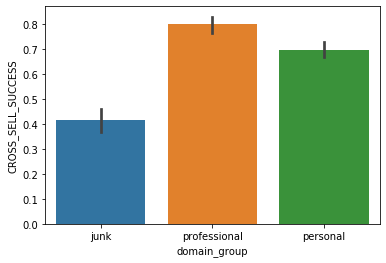

In [12]:
# Plotting email domain group
sns.barplot(x = 'domain_group', 
            y = 'CROSS_SELL_SUCCESS', 
            data = chef)

In [13]:
# one hot encoding categorical variables
encode_email_domain = pd.get_dummies(chef['email_domain'])
encode_domain_group = pd.get_dummies(chef['domain_group'])


# dropping categorical variables after they've been encoded
chef = chef.drop('email_domain', axis = 1)
chef = chef.drop('domain_group', axis = 1)
chef = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis=1)


# joining codings together
chef = chef.join([encode_email_domain, encode_domain_group])

In [14]:
# Saving feature-rich dataset into excel
chef.to_excel("Apprentice_Chef_Dataset_model_rich.xlsx",
              index = False)

***

<br><h1>Part III: Ordinary Least Squares Regression</h1>
- Model Development in stats model; experiment with different variable combinations in Ordinary Least Square (OLS) and analyze results
- Develop Candidate Models; take model(s) with highest predictive power and save its variables as a new dataset

In [15]:
# Setting explanatory variables
chef_features = chef.drop(['REVENUE'], axis = 1)

# Formatting each explanatory variable for statsmodels
for val in chef_features:
    print(f"chef['{val}'] +")

chef['CROSS_SELL_SUCCESS'] +
chef['TOTAL_MEALS_ORDERED'] +
chef['UNIQUE_MEALS_PURCH'] +
chef['CONTACTS_W_CUSTOMER_SERVICE'] +
chef['PRODUCT_CATEGORIES_VIEWED'] +
chef['AVG_TIME_PER_SITE_VISIT'] +
chef['MOBILE_NUMBER'] +
chef['CANCELLATIONS_BEFORE_NOON'] +
chef['CANCELLATIONS_AFTER_NOON'] +
chef['TASTES_AND_PREFERENCES'] +
chef['MOBILE_LOGINS'] +
chef['PC_LOGINS'] +
chef['WEEKLY_PLAN'] +
chef['EARLY_DELIVERIES'] +
chef['LATE_DELIVERIES'] +
chef['PACKAGE_LOCKER'] +
chef['REFRIGERATED_LOCKER'] +
chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef['AVG_PREP_VID_TIME'] +
chef['LARGEST_ORDER_SIZE'] +
chef['MASTER_CLASSES_ATTENDED'] +
chef['MEDIAN_MEAL_RATING'] +
chef['AVG_CLICKS_PER_VISIT'] +
chef['TOTAL_PHOTOS_VIEWED'] +
chef['out_total_meals_ordered'] +
chef['out_product_category_viewed'] +
chef['out_uniqe_meals_purchase'] +
chef['out_contacts_cust_service'] +
chef['out_avg_time_per_visit'] +
chef['out_weekly_plan'] +
chef['out_early_delivery'] +
chef['out_late_delivery'] +
chef['out_prep_vid'] +


In [16]:
# Building a full OLS model with all features
ols_full = smf.ols(formula = """chef['REVENUE'] ~ chef['CROSS_SELL_SUCCESS'] +
                                chef['TOTAL_MEALS_ORDERED'] +
                                chef['UNIQUE_MEALS_PURCH'] +
                                chef['CONTACTS_W_CUSTOMER_SERVICE'] +
                                chef['PRODUCT_CATEGORIES_VIEWED'] +
                                chef['LATE_DELIVERIES'] +
                                chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                chef['AVG_PREP_VID_TIME'] +
                                chef['LARGEST_ORDER_SIZE'] +
                                chef['MASTER_CLASSES_ATTENDED'] +
                                chef['MEDIAN_MEAL_RATING'] +
                                chef['AVG_CLICKS_PER_VISIT'] +
                                chef['TOTAL_PHOTOS_VIEWED'] +
                                chef['out_total_meals_ordered'] +
                                chef['out_product_category_viewed'] +
                                chef['out_uniqe_meals_purchase'] +
                                chef['out_contacts_cust_service'] +
                                chef['out_weekly_plan'] +
                                chef['out_early_delivery'] +
                                chef['out_prep_vid'] +
                                chef['out_master_class'] +
                                chef['out_median_meal_rate'] +
                                chef['change_avg_time_per_visit'] +
                                chef['change_contacts_cust_service'] +
                                chef['change_prep_vid'] +
                                chef['change_total_photos_view'] +
                                chef['change_total_photo_view'] +
                                chef['change_median_meal_rate'] +
                                chef['change_unique_meals_purch_change'] +
                                chef['out_revenue'] +
                                chef['AVG_WEEKLY_MEALS_PER_CUSTOMER'] +
                                chef['REVENUE_PER_MEAL'] +
                                chef['junk'] +
                                chef['personal'] +
                                chef['professional']""",
                                data = chef)


# telling Python to run the data through the blueprint
results_full = ols_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chef['REVENUE']   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     366.4
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:40:22   Log-Likelihood:                -14571.
No. Observations:                1946   AIC:                         2.921e+04
Df Residuals:                    1914   BIC:                         2.938e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 -354.7848    149.687     -2.370      0.018    -648.352     -61.218
chef['CROSS_SELL_SUCCESS']                 -44.7637     24.968     -1.793      0.073     -93.730       4.203
chef['TOTAL_MEALS_ORDERED']                  9.8868      0.374     26.442      0.000       9.154      10.620
chef['UNIQUE_MEALS_PURCH']                  -4.6330      4.777     -0.970      0.332     -14.001       4.735
chef['CONTACTS_W_CUSTOMER_SERVICE']         63.1026      7.372      8.560      0.000      48.644      77.561
chef['PRODUCT_CATEGORIES_VIEWED']            3.1196      3.312      0.942      0.346      -3.375       9.614
chef['LATE_DELIVERIES']                      8.9715      3.620      2.478      0.013       1.871      16.072
chef['FOLLOWED_RECOMMENDATIONS_PCT']         0.8791      0.424      2.072      0.038       0.047       1.711
chef['AVG_PREP_VID_TIME']                    4.7101      0.454     10.366      0.000       3.819       5.601
chef['LARGEST_ORDER_SIZE']                 -56.0480     11.175     -5.015      0.000     -77.965     -34.131
chef['MASTER_CLASSES_ATTENDED']            102.2207     18.495      5.527      0.000      65.948     138.493
chef['MEDIAN_MEAL_RATING']                 200.3755     28.920      6.929      0.000     143.658     257.093
chef['AVG_CLICKS_PER_VISIT']               -15.5869      8.344     -1.868      0.062     -31.952       0.778
chef['TOTAL_PHOTOS_VIEWED']                  0.5593      0.102      5.459      0.000       0.358       0.760
chef['out_total_meals_ordered']           -496.4836    125.104     -3.969      0.000    -741.837    -251.130
chef['out_product_category_viewed']         61.4698     20.841      2.949      0.003      20.597     102.343
chef['out_uniqe_meals_purchase']          -318.4137    114.244     -2.787      0.005    -542.469     -94.358
chef['out_contacts_cust_service']         -712.7513     32.175    -22.152      0.000    -775.853    -649.649
chef['out_weekly_plan']                     17.8242     24.871      0.717      0.474     -30.952      66.601
chef['out_early_delivery']                  63.8648     35.628      1.793      0.073      -6.008     133.738
chef['out_prep_vid']                        80.6898     64.271      1.255      0.209     -45.359     206.738
chef['out_master_class']                  -459.3435    186.161     -2.467      0.014    -824.444     -94.243
chef['out_median_meal_rate']              -735.4863    131.105     -5.610      0.000    -992.610    -478.362
chef['change_avg_time_per_visit']         -142.1410    137.398     -1.035      0.301    -411.606     127.324
chef['change_contacts_cust_service']      -712.7513     32.175    -22.152      0.000    -775.853    -649.649
chef['change_prep_vid']        

In [17]:
# Preparing Revenue as response variable and store as "chef_target"
chef_target = chef.loc[:, 'REVENUE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(chef_features,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222)

In [18]:
# Selecting set of x-variables for training dataset
x_variables = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED', 'LATE_DELIVERIES', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'out_total_meals_ordered', 
'out_product_category_viewed', 'out_uniqe_meals_purchase', 'out_contacts_cust_service', 'out_weekly_plan', 'out_early_delivery', 
'out_prep_vid', 'out_master_class', 'out_median_meal_rate', 'change_avg_time_per_visit', 'change_contacts_cust_service', 
'change_prep_vid', 'change_total_photos_view', 'change_total_photo_view', 'change_median_meal_rate',
'change_unique_meals_purch_change', 'out_revenue', 'AVG_WEEKLY_MEALS_PER_CUSTOMER', 'REVENUE_PER_MEAL', 
'junk', 'personal', 'professional']

for val in x_variables:
    print(f"chef_train['{val}']+")

chef_train['CROSS_SELL_SUCCESS']+
chef_train['TOTAL_MEALS_ORDERED']+
chef_train['UNIQUE_MEALS_PURCH']+
chef_train['CONTACTS_W_CUSTOMER_SERVICE']+
chef_train['PRODUCT_CATEGORIES_VIEWED']+
chef_train['LATE_DELIVERIES']+
chef_train['FOLLOWED_RECOMMENDATIONS_PCT']+
chef_train['AVG_PREP_VID_TIME']+
chef_train['LARGEST_ORDER_SIZE']+
chef_train['MASTER_CLASSES_ATTENDED']+
chef_train['MEDIAN_MEAL_RATING']+
chef_train['AVG_CLICKS_PER_VISIT']+
chef_train['TOTAL_PHOTOS_VIEWED']+
chef_train['out_total_meals_ordered']+
chef_train['out_product_category_viewed']+
chef_train['out_uniqe_meals_purchase']+
chef_train['out_contacts_cust_service']+
chef_train['out_weekly_plan']+
chef_train['out_early_delivery']+
chef_train['out_prep_vid']+
chef_train['out_master_class']+
chef_train['out_median_meal_rate']+
chef_train['change_avg_time_per_visit']+
chef_train['change_contacts_cust_service']+
chef_train['change_prep_vid']+
chef_train['change_total_photos_view']+
chef_train['change_total_photo_view']+
chef_tra

In [19]:
# Merging X_train and y_train
chef_train = pd.concat([X_train, y_train], axis = 1)

lm_best = smf.ols(formula = """ REVENUE ~chef_train['CROSS_SELL_SUCCESS'] +
                                chef_train['TOTAL_MEALS_ORDERED'] +
                                chef_train['UNIQUE_MEALS_PURCH'] +
                                chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                chef_train['PRODUCT_CATEGORIES_VIEWED'] +
                                chef_train['LATE_DELIVERIES'] +
                                chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                chef_train['AVG_PREP_VID_TIME'] +
                                chef_train['LARGEST_ORDER_SIZE'] +
                                chef_train['MASTER_CLASSES_ATTENDED'] +
                                chef_train['MEDIAN_MEAL_RATING'] +
                                chef_train['AVG_CLICKS_PER_VISIT'] +
                                chef_train['TOTAL_PHOTOS_VIEWED'] +
                                chef_train['out_total_meals_ordered'] +
                                chef_train['out_product_category_viewed'] +
                                chef_train['out_uniqe_meals_purchase'] +
                                chef_train['out_contacts_cust_service'] +
                                chef_train['out_weekly_plan'] +
                                chef_train['out_early_delivery'] +
                                chef_train['out_prep_vid'] +
                                chef_train['out_master_class'] +
                                chef_train['out_median_meal_rate'] +
                                chef_train['change_avg_time_per_visit'] +
                                chef_train['change_contacts_cust_service'] +
                                chef_train['change_prep_vid'] +
                                chef_train['change_total_photos_view'] +
                                chef_train['change_total_photo_view'] +
                                chef_train['change_median_meal_rate'] +
                                chef_train['change_unique_meals_purch_change'] +
                                chef_train['out_revenue'] +
                                chef_train['AVG_WEEKLY_MEALS_PER_CUSTOMER'] +
                                chef_train['REVENUE_PER_MEAL'] +
                                chef_train['junk'] +
                                chef_train['personal'] +
                                chef_train['professional']""",
                                data = chef_train)


results = lm_best.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     288.4
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:40:22   Log-Likelihood:                -10874.
No. Observations:                1459   AIC:                         2.181e+04
Df Residuals:                    1427   BIC:                         2.198e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

***
***

<br><h1>Part IV: Utilizing appropriate Regression modeling techniques</h1>

We need to concatenate our training data on the 'x' side (X_train) and our training data on the 'y' side (y_train). Then, we can begin building models and analyze their results. Let's test our best model from our previous session to see how it performs. In the interest of time, this has already been prepared.

**Model Tournament**

Experiment with different (regression) model types in scikit-learn


**The MUST KNOW workflow of scikit-learn:**

- Instantiate
- Fit
- Predict
- Score

In [20]:
# Store X from selected features
chef_explanatory = chef.loc[ : , x_variables]

# Store target variables
chef_target = chef.loc[:, 'REVENUE']

# Running train/test split again
X_train, X_test, y_train, y_test = train_test_split(chef_explanatory,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222)

In [21]:
# Building Linear Regression Model
lr_model = LinearRegression()

lr_fit = lr_model.fit(X_train, y_train)

lr_pred = lr_fit.predict(X_test)

lr_train_score = lr_model.score(X_train, y_train).round(3)
lr_test_score  = lr_model.score(X_test, y_test).round(3)

In [22]:
# Building Ridge Model
ridge_model = sklearn.linear_model.Ridge()

ridge_fit = ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)

ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

In [23]:
# Building Linear Lasso Model
lasso_model = sklearn.linear_model.Lasso()

lasso_fit = lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)

lasso_train_score = lasso_model.score(X_train, y_train).round(3)
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

In [24]:
# Building ARD Model
ard_model = sklearn.linear_model.ARDRegression()

ard_fit = ard_model.fit(X_train, y_train)

ard_pred = ard_model.predict(X_test)

ard_train_score = ard_model.score(X_train, y_train).round(3)
ard_test_score  = ard_model.score(X_test, y_test).round(3)

In [25]:
# Building Decision Tree Model
tree_model = DecisionTreeRegressor(criterion = 'mse',
                                  min_samples_leaf = 15,
                                  random_state = 222)

tree_fit = tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

tree_train_score = tree_model.score(X_train, y_train).round(3)
tree_test_score = tree_model.score(X_test, y_test).round(3)

In [26]:
# Building KNN Model
knn_model = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 5)

knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

knn_train_score = knn_model.score(X_train, y_train).round(3)
knn_test_score = knn_model.score(X_test, y_test).round(3)

In [27]:
# Building TheilSen Model
th_model = TheilSenRegressor(random_state=222)

th_fit = th_model.fit(X_train, y_train)

th_pred = th_model.predict(X_test)

th_train_score = th_model.score(X_train, y_train).round(3)
th_test_score = th_model.score(X_test, y_test).round(3)

In [28]:
# Regression Models Summary

print(f"""
Model              Train Score      Test Score
---------------    ----------       ----------
Linear Reg.         {lr_train_score}           {lr_test_score}
Lasso               {lasso_train_score}           {lasso_test_score}
Ridge               {ridge_train_score}           {ridge_test_score}
ARD                 {ard_train_score}           {ard_test_score}
Tree                {tree_train_score}           {tree_test_score}
KNN                 {knn_train_score}           {knn_test_score}
TheilSen            {th_train_score}           {th_test_score}
""")


Model              Train Score      Test Score
---------------    ----------       ----------
Linear Reg.         0.862           0.832
Lasso               0.861           0.834
Ridge               0.862           0.832
ARD                 0.862           0.833
Tree                0.809           0.748
KNN                 0.812           0.678
TheilSen            0.853           0.821



***

<br><h1>Part V: Model Predictions and Residuals</h1>

After choosing a final model, it is important to check its residuals to ensure prediction errors are even across the modeling space. If the residuals appear to have no pattern, your model is in good shape. If they appear to be fanning in or fanning out, there may be more undiscovered features to engineer in order to capture more predictive value, or there may be nonlinear relationships present.


- **Lasso Regression Model** achieves training and testing score accuracy of **0.861 and 0.834** respectively.
- Let's check its residuals to ensure prediction errors are even across the modeling space. If the residuals appear to have no pattern, the model is in good shape. If they appear to be fanning in or fanning out, there may be more undiscovered features to engineer in order to capture more predictive value, or there may be nonlinear relationships present.


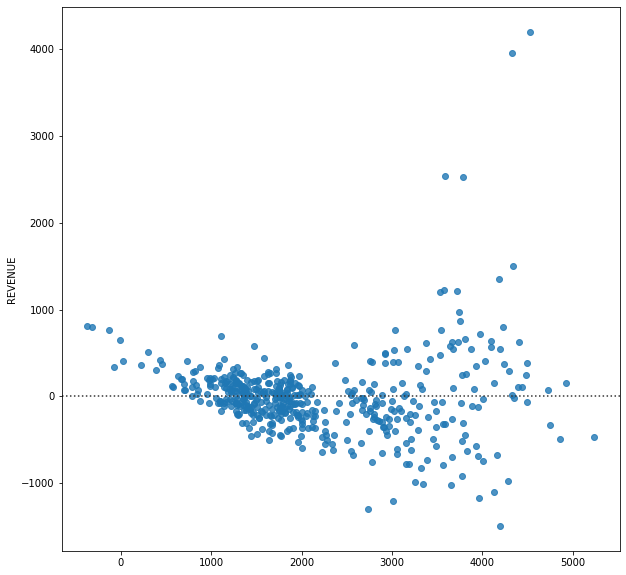

In [29]:
# Developing a residual plot for the best model: Lasso Regression
fig, ax = plt.subplots(figsize = (10, 10))

sns.residplot(x = lasso_pred,
              y = y_test)

plt.show()

***
***

<h3>Business Insights:</h3>

- The current product is able to drive revenue through a number of different ways. However, there are two features that significantly positively correlated to revenue. The first one is time spent watching meal prep video. Based on this finding we can derive that the more users enjoy a video, the higher the chance they will purchase the meal. The second feature is the rating of the meal, higher rating meals will attract more revenue. Here we can conclude that users are highly dependent on other people’s opinion and will buy meals that other consumers recommend through their high ratings.
- There are features that seem to negatively impact revenue. The highest contributor is number of clicks. At above 12 clicks per visit, the revenue is negatively impacted. Whilst at 10-12 clicks, the revenue impact is the highest. From this data we can safely assume that if the user is not prompted with an attractive call to action (CTA) by the 12th click, the likelihood of purchase goes down.

<h3>Recommendation:</h3>

- To create more meal prep content that are good quality and make it easy for users to access when using the platform.
- Feature the high rated meals prominently on the platform so people are attracted to purchase. Where possible also include good written reviews from past consumers to further enhance the recommendation.
- Ensure the user journey on the platform does not become to draggy without a clear CTA. Create multiple user journeys that will prompt users at the 10th or 12th click with either an attractive purchase offer, lead to a meal prep video or lead to a highly rated meal.

<h3>Thank you</h3>
Shoot me an email for any queries: ivanmanurung89@gmail.com
<br><br>